<div style="padding:30px; color: white; background-color: #0071CD">
<center>
    <img src="img/logoub.jpeg"></img>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas Enumerativos</h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Backtracking</h1>
</center>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
<h2><p>0. Cartas</p></h2>
<p>
Supongamos que tenemos un conjunto de parejas de cartas del mismo valor. En particular, tenemos parejas de cartas hasta N. Por ejemplo, para $N=3$ tendríamos una pareja de 1s, una de 2s y una de 3s (un total de 6 cartas). Lo que queremos es encontrar la manera de ordenarlas para que entre las dos cartas de valor $n_i$ haya exactamente $n_i$ cartas. En el ejemplo con $N=3$ tendríamos la siguiente solución:
</p>
<center> <b>   3 - 1 - 2 - 1- 3 - 2 </b></center>
<p>
Podemos observar que entre los 3 hay tres cartas, entre los 2 hay dos y entre los 1 solo hay una. Dependiendo del tamaño de N el problema podría no tener solución. Por ejemplo $N=5$ o $N=6$. Se pide la implementación de un algoritmo que, mediante backtracking, devuelva una lista con la configuración encontrada dado un valor N. En caso de no haber solución, debe devolver una lista vacía.
</p> <p>
Es importante destacar que tendréis que prestar especial atención a la complejidad de vuestra solución, dado que el problema crece de forma no polinómica y para un valor $N>12$ podría tardar horas. Hay diferentes aproximaciones para resolverlo. Bien hecho, $N=12$ debería tardar escasos segundos. Si haces varias versiones, puedes entregarlas junto con la comparativa de complejidad correspondiente.</p>
</div>

In [1]:
def compute(n):
    """
    Computes the possible combinations
    of positions for every card.
    
    Parameters
    ----------
        n, int
        
    Returns
    -------
        dict
            Possible combinations
    """
    
    sol = {}
    
    for i in range(n, 0, -1):
        sol[i] = []
        
        for j in range((2 * n) - i - 1):
            x, y = j, j + i + 1
            
            sol[i].append((x, y))  
    
    return sol

compute(3)

{1: [(0, 2), (1, 3), (2, 4), (3, 5)],
 2: [(0, 3), (1, 4), (2, 5)],
 3: [(0, 4), (1, 5)]}

In [2]:
def naive_deck(n, solutions={}, selected=[]):
    """
    Naive implementation.
    Recursive and slow af.
    For n > 12, if takes a while...
    
    Parameters
    ----------
        n, int
        
        solutions, dict 
            Rec. parameter
        selected, list
            Rec. parameter
        
    Returns
    -------
        list
            Card ordering, or
            empty if can not.
    """
    
    if n == 0:
        return selected if all(selected) else []
    
    for x, y in solutions[n]:
        ss = selected.copy()
        
        if not ss[x] and not ss[y] and n not in ss:            
            ss[x], ss[y] = n, n
            
            # print(n, (x, y), ss)
            _s = naive_deck(n - 1, solutions=solutions, selected=ss)
            
            if _s and len(_s) > 0:
                return _s
    
    return selected if all(selected) else []

n = 3
naive_deck(n, solutions=compute(n), selected=[False for _ in range(2 * n)])

[3, 1, 2, 1, 3, 2]

In [3]:
import sys
!{sys.executable} -m pip install --user numpy matplotlib

import numpy as np

  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/0c/fc2e007d9a992d997f04a80125b0f183da7fb554f1de701bbb70a8e7d479/pyparsing-2.4.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using

In [4]:
def deck(n):
    """
    Algorithm to compute the ordering
    of n pairs of cards with the given
    conditions.
    
    Parameters
    ----------
        n, int
        
    Returns
    -------
        list
            Deck ordering or
            empty list if do not exist
    """
    
    # Init the (2 * n) x n matrix 
    # with 0 values (initial states).
    
    m = np.array([[ 0 for _ in range(2 * n)] for _ in range(n) ], dtype=np.int)
    i, error = 0, False
    
    while i < n:
        p = n - i
        
        # Initial case
        
        if i == 0:
            
            # The _break variable will be
            # used in this algorithm to check
            # if we selected a pair or not.
            
            _break = False
            
            for j in range((2 * n) - p - 1):
                
                # Only select when the current 
                # position is a zero (initial state)
                
                if m[i][j] == 0:
                    
                    # Mark the selected column (j)
                    # with the pivot, in this case n.
                    # And set _break to True,
                    # as we found a candidate, 
                    # and break the loop.
                    
                    m[i:,j], m[i:,j + p + 1] = p, p
                    _break = True
                    
                    break
            
            # If we could not find a candidate
            # we break the main while loop with
            # an error code, as we could not find
            # a valid position for the pair (n, n).
            
            if not _break:
                error = True
                break
                
            # If we could find a candidate
            # continue in the next iteration
                
            i += 1
            continue
        
        
        # "Normal" case
        
        _break = False
        
        # Loop over all possible 
        # positions for the current pivot
        
        for j in range((2 * n) - p - 1):
            
            # If we find anything else from a zero
            # (used states)
            # then it's not a valid position,
            # so we continue to the next candidate.
            
            if m[i][j] != 0 or m[i][j + p + 1] != 0:
                continue
            
            # If we found a candidate, we mark
            # the pair of columns with the pivot,
            # but from the i-th row to the last.
            # We set _break = True like before.
            
            m[i:,j], m[i:,j + p + 1] = p, p
            _break = True
            
            break
        
        # If we could not find a valid candidate for p
        # then some pivot in the upper rows is incorrect.
        
        if not _break:
            
            # We find the indices of the upper pivot
            # and mark the FIRST one with a -1 (used state)
            # and the other with a 0 (reset the state to initial).
            # See that from the first candidate column
            # we only mark the (i-1)-th row, so the
            # next pivots are not affected by this change.
            
            _indexes = np.argwhere(m[i - 1] == p + 1)
            
            m[i - 1,_indexes[0]] = -1
            m[i:,_indexes[0]] = 0
            m[i - 1:,_indexes[1]] = 0
            
            # Go back to the upper row
            
            i -= 1
            continue
        
        # If all OK, we continue to the following row
        
        i += 1
    
    # If there was an error, the order
    # do not exist, so we return an empty list
        
    return list(m[-1]) if not error else list()

In [5]:
def check_deck(n, d):
    """
    Checks if a given deck
    ordering is correct, i.e. it
    satisfies the given conditions.
    
    Parameters
    ----------
        n, int
        d, list
        
    Returns
    -------
        boolean
    """
    
    if len(d) == 0:
        return None
    
    arr = np.array(d)
    
    for i in range(1, n + 1):
        x, y = np.argwhere(arr == i).flatten()
        
        if x + i + 1 != y:
            return False
        
    return True

### Tests

In [6]:
for n in range(1, 41):
    sol = deck(n)
        
    if len(sol) > 0:
        if check_deck(n, sol):
            print(f"deck({n:2d}): OK!")

deck( 3): OK!
deck( 4): OK!
deck( 7): OK!
deck( 8): OK!
deck(11): OK!
deck(12): OK!
deck(15): OK!
deck(16): OK!
deck(19): OK!
deck(20): OK!
deck(23): OK!
deck(24): OK!
deck(27): OK!
deck(28): OK!
deck(31): OK!
deck(32): OK!
deck(35): OK!
deck(36): OK!
deck(39): OK!
deck(40): OK!


### Benchmarks

In [7]:
from time import time

N = 70
t_arr = []

for n in range(1, N + 1):
    t = time()
    sol = deck(n)
    t = time() - t
    
    t_arr.append(t)
    
    if n % 10 == 0:
        print(f"{n:2d} iterations done")

print(f"Done {n} iterations in {int(sum(t_arr)//60)} min {sum(t_arr)%60:4.6f} s.")

10 iterations done
20 iterations done
30 iterations done
40 iterations done
50 iterations done
60 iterations done
70 iterations done
Done 70 iterations in 4 min 23.297075 s.


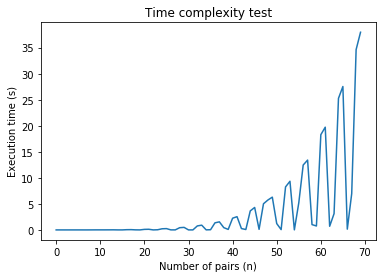

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(t_arr)

plt.xlabel("Number of pairs (n)")
plt.ylabel("Execution time (s)")
plt.title("Time complexity test")

plt.show()

## Analiza el coste de tu/s implementación/es:

### `naive_deck`

Algoritme gairebé directe. La complexitat és 
$$O\left[ \frac{2(n - 1)!}{(n - 2)} \right]$$

### `deck`

Versió optimitzada, inspirada en l'algoritme de backtracking utilitzat per resoldre el problema de les $N$ reines.

La complexitat és molt menor que la de l'algoritme anterior, ja que es rejecten molts casos de manera prou eficient.


<div class="alert alert-info">
<center>
  <h1>Ramificación y poda</h1>
</center>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1. Mochila</p></h2>
  
   <p> En esta primera sección trabajaremos con el problema de la mochila que ya vimos en problemas Greedy y PD. Refrequemos un poco (por si aún no lo tenéis claro):
</p>
    Nos encontramos en una habitación en la que hay $N$ objetos con pesos $w_1, w_2, w_3 ... w_N$ y tenemos una mochila que puede soportar una carga máxima de $W$. En este caso se pide que realicéis una implementación de Ramificación y Poda para resolver el problema de la mochila con valor:
<br><br>
 **mochila_valor:** Cada objeto tendrá asignado un valor $v_1, v_2, v_3 ... v_N$. Buscamos llenar la mochila maximizando el valor total de la mochila pero sin superar la capacidad máxima. Es decir queremos encontrar la combinación de objetos $b$ tal que $\arg_{b} \max{\sum_{i=0}^{N}{v_i · b_i}}$ con la condición de que $\sum_{i=0}^{N}{(w_i · b_i)}\leq W$.
     <br><br>
Trabajaremos únicamente con la versión de la mochila en la que tenemos una cantidad limitada $c_1, c_2, c_3 ... c_N$ de objetos.</div>


In [9]:
import random as rd

# Genera un conjunto de objetos de prueba en forma de una lista de listas, 
# cada una de las cuales representa un elemento [peso, valor, cantidad]

def random_objects():
    objects = [
        [p,v,c] 
        for p,v,c in zip(
            rd.sample(range(1, 50), k=10), 
            rd.sample(range(1, 100), k=10),
            rd.sample(range(1, 15), k=10))
    ]
    
    return objects

In [10]:
def greedy_bound(n, u, W, arr):
    """
    Returns the max weight given a partial 
    solution by computing the gready solution of knapsack
    
    Parameters
    ----------
        n, int
        u, list
        W, int
        arr, list
    
    Returns
    -------
        float
    """
    
    if u[3] >= W:
        return 0
    
    j, bound, weight = u[0] + 1, u[1], u[3]
    
    # Due the list arr is ordered decreasing by value/weight 
    # rate we jsut have to add the next items in the
    # list untill the reach the max capacity

    while j < n and weight + arr[j][0] < W:
        weight += arr[j][0]
        bound += arr[j][1]
        j += 1
    
    # If we haven't used the last item include it partialy to get a better upper bound
    # this is to be shure that we pass the upper bound and no possible solution is discarted
    
    if j < n:
        bound += (W - weight) * arr[j][1] / arr[j][0]
    
    return bound

In [13]:
def knapsack_branch(D, W):
    """
    Kanpsack problem solutions using 
    a branch and bound approach.
    
    Parameters
    ----------
        D, list
            List of the objects in the form
                [ ... [ weight, value, quant. ] ... ]
        W, int
            Capacity of the backpack
    
    Returns
    -------
        float
            Optimal backpack valuation
        list
            List with the selected objects
    """
    
    D = sorted(D, key=lambda x: x[1] / x[0], reverse=True)
    
    # Create a list with all the objects just once,
    # i.e. if we have two times the same object make two occurences of it in the new list
    
    arr = [[x[0], x[1]] for x in D for i in range(x[2])]
    max_profit, KS = 0, []
    
    # Create an empty list that will work as a queue
    
    Q = []
    
    # Create a list with u[ level, profit, bound, weight, [ parents ] ]
    # inicialize the first element to profit = weight = 0
    
    u = [-1, 0, None, 0, None]
    Q.append(u)

    r = 0
    
    while Q:
        u = Q.pop()
        
        # If there aren't more elements to check
        
        if(u[0] == len(arr)-1):
            continue
        
        v = [None for x in range(5)]
        
        # Increase the level, and see if not putting the object 
        # to the knasack give us a possible solution
        
        v[0] = u[0] + 1
        v[1], v[3] = u[1], u[3]
        
        # Save a list with the objects in the knapsack in the 
        # previous state, without nothing if it's the first step
        
        if u[0] == -1:
            v[4] = [None for k in range(len(arr))]
        
        else:
            v[4] = u[4].copy()
            
        # Get the bound on profit to decide whether add v to the queue Q
        
        v[2] = greedy_bound(len(arr), v, W, arr)
        
        # If the bound is greater tha max profit add v to Q
        
        if v[2] > max_profit:
            Q.append(v)
            
        # Now lets see if putting the object to the knasack 
        # give us a possible solution doing the same as above
        
        w = [None for x in range(5)]
        
        w[0] = u[0] + 1
        w[1] = u[1] + arr[w[0]][1]
        w[3] = u[3] + arr[w[0]][0]
        
        # Now also put the object on the list
        
        if u[0] == -1:
            w[4] = [None for k in range(len(arr))]
        
        else:
            w[4] = u[4].copy()
        
        w[4][v[0]] = [arr[w[0]][0], arr[w[0]][1],1]
        
        # If cumulated weight is les than the maximum allowed and 
        # profit is grater that the maxprofit then update maxprofit
        
        if w[3] < W and max_profit < w[1]:
            max_profit = w[1]
            
            # Save a list with the best solution untill now
            
            KS = w[4].copy() 
        
        # Get the bound on profit to decide whether add v to the queue Q
        # will use the function bound to compute that, which gives 
        # the gready solution to the problem using the current state
        
        w[2] = greedy_bound(len(arr), w, W, arr)
        
        # If the bound is greater tha max profit add w to Q
        
        if w[2] > max_profit:
            Q.append(w)
    
    Sol, k = [], -1
    
    for x in KS:
        if x is not None:
            if k == -1:
                Sol.append(x.copy())
                k += 1
                
            elif x[0] != Sol[k][0] and x[1] != Sol[k][1]:
                Sol.append(x.copy())
                k += 1
            
            else:
                Sol[k][2] += 1
    
    return max_profit, Sol

In [14]:
rd.seed(0) 
D, W = random_objects(), 150
v, l = knapsack_branch(D, W)

print(f"Solution ({v}): {l}")

Solution (1068): [[3, 65, 10], [20, 80, 5], [17, 18, 1]]


### Analiza el coste de tu implementación. Comparalo además con el coste de las implementaciones greedy y dinámica. Compara también la optimalidad de la solución en los tres casos.

La complexitat d'aquest algoritme és $O(n^2)$, on $n$ denota el nombre d'objectes a l'habitació, tenint en compte els objectes amb quantitats positives.
Aquesta es major que en els casos DP i Greedy.

En quan a optimalitat, tan aquest cas com el DP són óptims. Com vem veure, en el cas de Greedy no es pot assegurar la convergència cap a la solució óptima.


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2 - Orden de Ensamblaje</p></h2>
  
  <div class="row">
  <div>
  <p style="text-align: justify; padding-right: 30px">
La construcción de un artefacto requiere ensamblar $M$ piezas que identiﬁcamos con números entre $1$ y $M$. El coste de ensamblar la pieza $i$ depende del número de piezas ya ensambladas. Los costes, que son valores positivos, se nos proporcionan en una matriz $C$. La celda $c_{ij}$ es el coste de ensamblar la pieza $i$ cuando ya se han ensamblado $j$ piezas. Deseamos calcular el orden de ensamblado de menor coste total, entendido éste como la suma del coste de ensamblaje de cada una de las piezas. 
  Implementa mediante ramificación y poda una solución a este problema con tal de encontrar el listado ordenado de piezas cuyo coste total de ensamblaje sea mínimo.
  </p>
  </div>
    </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>C: Matriz de costes de tamaño $M\times M$, donde M es el número de piezas. El elemento $i,j$ de la matriz representa el coste de ensamblaje para la pieza $i$ tras haber colocado $j$ piezas. 
</li>
</ul>
<br>
<h3>OUTPUT</h3>
Lista de números de $1$ a $M$ ordenados de forma que el coste total de ensamblaje sea mínimo. Ej: [5, 3, 2, 4, 1]
</p>

</div>

### Conceptualització

Donada una matriu de cost $M$ ($m \times m$) inicial, definim el cost de $M$ com

$$C_M = \sum_{i=0}^{m-1} c_{ii}.$$

Ens demananen trobar una matriu $M'$ que sigui una permutació, per columnes, de $M$ tal que 

$$C_M' = min_{A \in \text{perm}(M)}\{C_A\}.$$


### Algoritme *naive*

La manera directa per a trobar-ne la solució és calculant-les totes, és a dir, les $m!$ possibilitats.

In [15]:
from itertools import permutations

def naive_branch_ensemble(C):
    """
    Naive algorithm
    
    Parameters
    ----------
        C
            Matrix of costs
        
    Returns
    -------
        list
            Optimal order of ensemble
            
        float
            Minimum ensemble cost
    """
    
    m, target, min_cost = len(C), None, 1e+9
    perms = list(permutations([i for i in range(m)]))
    
    # Loop over all possible 
    # permutations of columns
    
    for p in perms:
        _sum = sum([C[p[i]][i] for i in range(m)])
        
        # Update the target and min. cost
        # if it's less than the stored one
        
        if _sum < min_cost:
            min_cost, target = _sum, p
        
    return list(target), min_cost

In [16]:
def branch_ensemble(C):
    """
    Función que obtiene el orden óptimo 
    de las piezas tal que el coste total es mínimo.
    
    Parameters
    ----------
        C
            Matrix of costs
        
    Returns
    -------
        list
            Optimal order of ensemble
            
        float
            Minimum ensemble cost
    """
    
    m = len(C)
    target = np.array([i for i in range(m)], dtype=np.int)
    
    i = 0
    
    while i < m:
        
        # We select the min. k-th row 
        # for k >= i, and swap these rows
        
        k = i + np.argmin(C[i:,i])
        
        if k != i:
            C[[k, i]] = C[[i, k]]
            target[[i, k]] = target[[k, i]]
        
        # Now, we look if we can swap this row with a better
        # one from the selected before, i.e.
        # rows j < i
        
        for j in range(i - 1, -1, -1):
            _min_j = C[j][i] + C[i][j]
            
            if C[i][i] + C[j][j] > _min_j:
                target[[i, j]] = target[[j, i]]
        
        i += 1
        
    return list(target), sum(C[k][k] for k in range(m))

In [24]:
import random as rd
import numpy as np

from random import uniform

rd.seed(0)

M = 5
C = {}

for i in range(M):
    C[i] = {}
    
    for j in range(M):
        C[i][j] = uniform(1, 25)
    
M = np.array([list(C[k].values()) for k in C])

print(naive_branch_ensemble(M))
print(branch_ensemble(M))

([3, 2, 1, 0, 4], 47.949569336106435)
([3, 2, 1, 0, 4], 47.949569336106435)


### Explica cómo has realizado tu implementación, enfatizando en la heurística empleada.

La implementació actual intenta escollir en cada iteració, primer, el millor candidat per sota del índex actual i, segon, si pot fer algun canvi amb una fila escollida anteriorment.

### Análisis de complejidad de la implementación

La complexitat és $O(n^2)$, on $n$ denota la dimnesió de la matriu. 